# Basic Idea:
- We generate a sample D from a population P
- We want to know something about the population P, in the form of moments of the distribution
- We calculate T(d), to get some sort of statistic maybe $\theta$ or $\sigma$
- These parameters will vary depending on the values in our random sample D, so they themselves are random values
- Therefore they will have a distribution, a sampling distribution
- The formula for the standard error is something like this, but it is typically hard to derive forumals for these values
- Therefore, we must repeadetly sample from the population to get a sense of the distrubtion
## This is where Monte Carlo Principle comes in
- $E[T(D)] =$ $1/n$ $\sum_{i=1}^{n} T(D)$
- The principle holds for the variance and other moments of the distribution 

http://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/28/lecture-28.pdf

### Monte Carlo Principle for evaluating integrals that do not have close formed solutions
- Estimate the average integrand and use this to solve the integral, for a range of values
- Evaluate the function at random inputs
- Please see the below link for a more thorough explanation
https://github.com/afeiguin/comp-phys/blob/master/10_01_montecarlo_integration.ipynb

In [1]:
import math
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt


def difficult_to_integrate(x):
    '''
    this is a difficult function to integrate, we can use monte carlo methods to estimate
    '''
    return (x**2*math.e**(x**(1/2))-(x*x/2)+x)

In [2]:
def get_rand(a,b):
    
    '''
    for the range(a,b), our limits of integration, generate a random point between
    b is the upper limit, a is the lower limit
    '''
    range_ = b-a
    rand_val = random.uniform(0,1)
    return a + range_*rand_val

In [3]:
difficult_to_integrate(get_rand(0,5))

8.588808171758735

In [4]:
def get_avg(a,b,n):
    '''
    generate random number
    evaluate the function n times
    take the average
    '''
    sum_of_function = 0
    for i in range(n):
        randy = get_rand(a,b)
        evaluation = difficult_to_integrate(randy)
        sum_of_function+=evaluation
    aver = (b-a)*(sum_of_function/n)   
    return aver
    

In [5]:
get_avg(0,8,100000)

1976.6992748873029

In [6]:
def get_var(a,b,n):
    
    # get the average of squares
    running_total = 0
    for i in range(n):
        running_total += difficult_to_integrate(get_rand(a, b))**2
    sum_of_sqs = running_total*(b-a) / n
    
    # get square of average
    running_total = 0
    for i in range(n):
        running_total = difficult_to_integrate(get_rand(a, b))
    sq_ave = ((b-a)*running_total/n)**2
    
    return sum_of_sqs - sq_ave

In [7]:
math.sqrt(get_var(0,5,10000))

189.88341543175065

# Gradient Descent for Ridge Regression

In [195]:
x = 2*np.random.rand(1000,1)
y = 10+45*x + np.random.randn(1000,1)
train = np.hstack((np.ones(len(x)).reshape(len(x), x.shape[1]),x))
thet = np.random.rand(train.shape[1],1)

In [196]:
def hypothesis(thetas, x):
    
    yhat = np.dot(x, thetas)
    
    return yhat

In [197]:
def compute_cost( x, y, thetas, lam):
    """Compute the value of cost function, J.
    Here J is total Least Square Error
    """
    m = len(y)
    cost = (1/2*m) * np.sum(np.square(hypothesis(thetas,x) - y)) + lam*np.dot(thetas.T, thetas)
    return cost

In [199]:
def gradient_descent(x, y, thet, lam, alpha,iters):
        
    costhistory = np.zeros((iters,1))
    thetahistory = np.zeros((iters,len(thet)))
    
    for i in range(iters):
        
        thet = thet - (1/len(y)) * alpha * (x.T.dot((hypothesis(thet,x) - y))) + lam/len(y) * thet
        cost_ = compute_cost( x, y, thet, lam)
        costhistory[i] = cost_
        thetahistory[i,:] = thet.T
        
    return (thet , costhistory)
        
    

In [212]:
results = gradient_descent(train, y, thet, .1, .6,  100)

[[ 9.94642663]
 [45.05609412]]


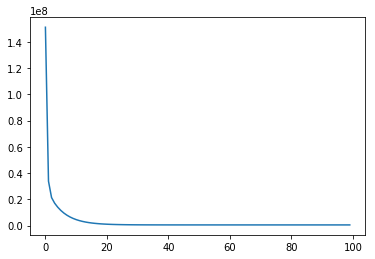

In [213]:
plt.plot(results[1])
print(results[0])
plt.show()

## Cross Validation

What does it mean to partition your data set? With K-Folds? Suppose you have an array of len(n), and want k folds. You are essentially replicating the data K times, and removing n-m points randomly from the data. Lets say you have a list of length 20, and want 1 fold. This is simply your train-test case without cross validation. Some %threshold is specified, say 70%, the remaining 30% is now your test set. You train the model on the 70% and test it on the remaining 30%.

We do this same procedure but for K folds of the data. 

In [27]:
import pandas as pd
import random
import math
import numpy as np
dicc = {'x':np.random.permutation(np.arange(1,100))[:50]}
df = pd.DataFrame(dicc)
df['y'] = 4 + 3*df['x'] + np.random.RandomState(42).normal(0, 1, len(df['x']))
train = np.hstack((np.ones(len(df)).reshape(len(df), 1),df.values))

In [44]:
import random
def train_test_split(data, split, trainingSet = [], testSet = []):
    for x in range(len(data)):
        if random.random() < split:
            trainingSet.append(data[x])
        else:
            testSet.append(data[x])
    return trainingSet,testSet

In [1]:
from random import shuffle

def partition_k_fold(items, k):
    
    items = list(items)
    shuffle(items)

    slices = [items[i::k] for i in range(k)]

    for i in range(k):
        validation = slices[i]
        training = [item for s in slices if s is not validation for item in s]
        yield training, validation